In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('./weather data/weatherHistory.csv')

In [9]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [29]:
df.shape

(96453, 11)

In [30]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [31]:
df.describe(include=['object','bool'])

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,96453,96453
unique,96429,27,2,214
top,2010-08-02 20:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85741,20085


In [10]:
df.index

RangeIndex(start=0, stop=96453, step=1)

In [34]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [12]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [13]:
df['Precip Type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96453, dtype: object

In [15]:
df['Precip Type'].fillna('rain', inplace = True)

In [16]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [17]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 96453 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [26]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [27]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [37]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [38]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [39]:
df = df.set_index('Formatted Date')

In [40]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [53]:
data_columns = ['Apparent Temperature (C)','Humidity']
df[data_columns].head()


,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


In [54]:
month_mean = df[data_columns].resample('MS').mean()
month_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


In [55]:
import warnings

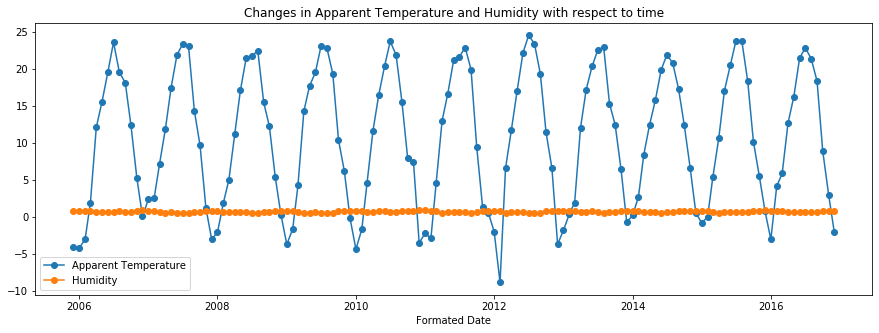

In [75]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,5))
plt.title("Changes in Apparent Temperature and Humidity with respect to time")
plt.xlabel("Formated Date")
plt.plot(month_mean,marker = 'o')
plt.legend(['Apparent Temperature','Humidity'])
plt.show()

In [78]:
df1 = month_mean[month_mean.index.month==2]
print(df1)
df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2007-02-01 00:00:00+00:00                  2.639848  0.815015
2008-02-01 00:00:00+00:00                  1.915597  0.682615
2009-02-01 00:00:00+00:00                 -1.641237  0.821161
2010-02-01 00:00:00+00:00                 -1.662045  0.851682
2011-02-01 00:00:00+00:00                 -2.849471  0.854137
2012-02-01 00:00:00+00:00                 -8.817241  0.762859
2013-02-01 00:00:00+00:00                  0.418171  0.869345
2014-02-01 00:00:00+00:00                  2.742998  0.812530
2015-02-01 00:00:00+00:00                  0.017006  0.803452
2016-02-01 00:00:00+00:00                  4.150782  0.836853


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 0, 'Month of February')

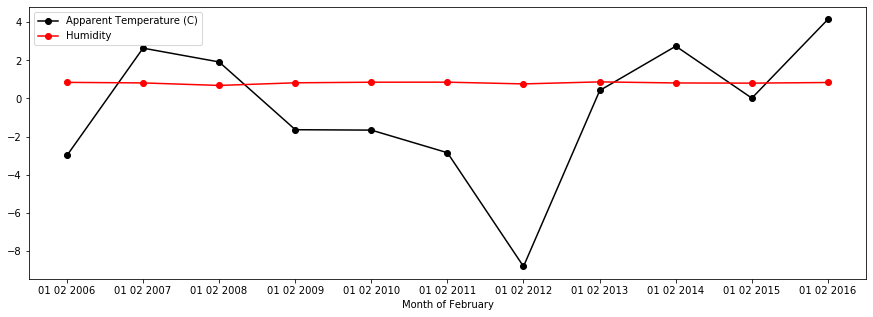

In [84]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-02-01':'2016-02-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'black')
ax.plot(df1.loc['2006-02-01':'2016-02-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'red')
ax.set_xticks(['02-01-2006','02-01-2007','02-01-2008','02-01-2009','02-01-2010','02-01-2011','02-01-2012','02-01-2013','02-01-2014','02-01-2015','02-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'top left')
ax.set_xlabel('Month of February')